## Synthetic Mixing Experiments

### Linear Mixing

In [1]:
# use hydra configs to load the dataset
import hydra
from utils import hydra_custom_resolvers
import torch
from torchvision import transforms
import torch.nn.functional as F
import numpy as np
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
from PIL import Image as Image, ImageEnhance
configs_path = "configs"
# config_name = "train_root.yaml"
config_name = "train_root.yaml"

with hydra.initialize(config_path=configs_path):
    config = hydra.compose(config_name=config_name,
                            overrides=[
                                "datamodule=mixing",
                                "datamodule.dataset.num_domains=10",
                                # "model=mixing"
                            ],
                            return_hydra_config=True,
    )

    # setup the dataset with the hydra config
    datamodule = hydra.utils.instantiate(config.datamodule, _recursive_=False)
    datamodule.prepare_data()
    datamodule.setup()

    # instantiate the model with hydra
    # model = hydra.utils.instantiate(config.model, _recursive_=False)

iterator = iter(datamodule.test_dataloader())

/home/mila/s/sayed.mansouri-tehrani/.conda/envs/bb/lib/python3.7/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [9]:
z_dim_invariant_data = datamodule.train_dataset.dataset.z_dim_invariant
z_dim = datamodule.train_dataset.dataset.z_dim

In [3]:
batch = next(iterator)

In [4]:
batch["z"][(batch["domain"] == 1).squeeze(), :z_dim_invariant_data].min()

tensor(0.0984)

In [11]:
for domain_idx in range(datamodule.train_dataset.dataset.num_domains):
    print(f"domain:{domain_idx} -- min:{batch['z'][(batch['domain'] == domain_idx).squeeze(), :z_dim_invariant_data].min()}, max:{batch['z'][(batch['domain'] == domain_idx).squeeze(), :z_dim_invariant_data].max()}, mean:{batch['z'][(batch['domain'] == domain_idx).squeeze(), :z_dim_invariant_data].mean()}")
print("----------------")
for domain_idx in range(datamodule.train_dataset.dataset.num_domains):
    print(f"domain:{domain_idx} -- min:{batch['z'][(batch['domain'] == domain_idx).squeeze(), z_dim_invariant_data:].min()}, max:{batch['z'][(batch['domain'] == domain_idx).squeeze(), z_dim_invariant_data:].max()}, mean:{batch['z'][(batch['domain'] == domain_idx).squeeze(), z_dim_invariant_data:].mean()}")
print("----------------")
for domain_idx in range(datamodule.train_dataset.dataset.num_domains):
    for z_dim_spurious in range(z_dim_invariant_data, z_dim):
        print(f"domain:{domain_idx}, z_dim:{z_dim_spurious} -- min:{batch['z'][(batch['domain'] == domain_idx).squeeze(), z_dim_spurious].min()}, max:{batch['z'][(batch['domain'] == domain_idx).squeeze(), z_dim_spurious].max()}, mean:{batch['z'][(batch['domain'] == domain_idx).squeeze(), z_dim_spurious].mean()}")

----------------
domain:0, z_dim:2 -- min:-3.395689010620117, max:-1.9791346788406372, mean:-2.710878849029541
domain:0, z_dim:3 -- min:-1.2148573398590088, max:-0.8057138919830322, mean:-1.0142569541931152
domain:1, z_dim:2 -- min:-4.767006874084473, max:-2.539933681488037, mean:-3.676292896270752
domain:1, z_dim:3 -- min:-4.0764007568359375, max:-0.9848365783691406, mean:-2.4427056312561035
domain:2, z_dim:2 -- min:-1.7045924663543701, max:-0.3207516670227051, mean:-0.9372190237045288
domain:2, z_dim:3 -- min:1.9994860887527466, max:2.109677791595459, mean:2.0614607334136963
domain:3, z_dim:2 -- min:3.3331382274627686, max:4.46589469909668, mean:3.8830065727233887
domain:3, z_dim:3 -- min:-2.0340495109558105, max:-0.48385369777679443, mean:-1.1251734495162964
domain:4, z_dim:2 -- min:-2.998680353164673, max:-1.8430469036102295, mean:-2.490309715270996
domain:4, z_dim:3 -- min:-4.002238750457764, max:-3.2039177417755127, mean:-3.526283025741577
domain:5, z_dim:2 -- min:-4.054628849029

### Polynomial Mixing

In [23]:
# use hydra configs to load the dataset
import hydra
from utils import hydra_custom_resolvers
import torch
from torchvision import transforms
import torch.nn.functional as F
import numpy as np
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
from PIL import Image as Image, ImageEnhance
configs_path = "configs"
# config_name = "train_root.yaml"
config_name = "train_root.yaml"

with hydra.initialize(config_path=configs_path):
    config = hydra.compose(config_name=config_name,
                            overrides=[
                                "datamodule=mixing",
                                "datamodule.dataset.linear=False",
                                "datamodule.dataset.num_domains=10",
                                "datamodule.save_dataset=True",
                                "datamodule.load_dataset=False",
                                "datamodule.num_samples.train=30",
                                "datamodule.num_samples.valid=10",
                                "datamodule.num_samples.test=1000",
                                # "model=mixing"
                            ],
                            return_hydra_config=True,
    )

    # setup the dataset with the hydra config
    datamodule = hydra.utils.instantiate(config.datamodule, _recursive_=False)
    datamodule.prepare_data()
    datamodule.setup()

    # instantiate the model with hydra
    # model = hydra.utils.instantiate(config.model, _recursive_=False)

iterator = iter(datamodule.test_dataloader())

/tmp/ipykernel_15040/3621670213.py:15: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  with hydra.initialize(config_path=configs_path):


======== latent: torch.Size([4]) =========
(1,)
torch.Size([4])
(16,)
======== out: (1, 21) =========
======== latent: torch.Size([4]) =========
(1,)
torch.Size([4])
(16,)
======== out: (1, 21) =========
======== latent: torch.Size([4]) =========
(1,)
torch.Size([4])
(16,)
======== out: (1, 21) =========
======== latent: torch.Size([4]) =========
(1,)
torch.Size([4])
(16,)
======== out: (1, 21) =========
======== latent: torch.Size([4]) =========
(1,)
torch.Size([4])
(16,)
======== out: (1, 21) =========
======== latent: torch.Size([4]) =========
(1,)
torch.Size([4])
(16,)
======== out: (1, 21) =========
======== latent: torch.Size([4]) =========
(1,)
torch.Size([4])
(16,)
======== out: (1, 21) =========
======== latent: torch.Size([4]) =========
(1,)
torch.Size([4])
(16,)
======== out: (1, 21) =========
======== latent: torch.Size([4]) =========
(1,)
torch.Size([4])
(16,)
======== out: (1, 21) =========
======== latent: torch.Size([4]) =========
(1,)
torch.Size([4])
(16,)
======== out

/home/mila/s/sayed.mansouri-tehrani/.conda/envs/mdcrl/lib/python3.10/site-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [24]:
# z_dim_invariant_data = datamodule.train_dataset.z_dim_invariant
# z_dim = datamodule.train_dataset.z_dim

batch = next(iterator)



In [27]:
# batch["x"]
for domain_idx in range(4):
    print(batch["z"][(batch["domain"] == domain_idx).squeeze(), :2].min())
    print(batch["z"][(batch["domain"] == domain_idx).squeeze(), :2].max())
    print(batch["z"][(batch["domain"] == domain_idx).squeeze(), 2:].min())
    print(batch["z"][(batch["domain"] == domain_idx).squeeze(), 2:].max())
    print(f"========")


tensor(0.0297)
tensor(0.9840)
tensor(-1.8293)
tensor(1.9473)
tensor(0.0097)
tensor(0.9979)
tensor(-0.6666)
tensor(2.7252)
tensor(0.0015)
tensor(0.9997)
tensor(2.9394)
tensor(4.7460)
tensor(0.0436)
tensor(0.9636)
tensor(-3.4986)
tensor(2.3948)


In [22]:
batch["z"][(batch["domain"] == domain_idx).squeeze(), :4].shape

torch.Size([10, 4])

### Encoded Polynomial Mixing Dataset

In [3]:
# use hydra configs to load the dataset
import hydra
from utils import hydra_custom_resolvers
import torch
from torchvision import transforms
import torch.nn.functional as F
import numpy as np
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
from PIL import Image as Image, ImageEnhance
configs_path = "configs"
# config_name = "train_root.yaml"
config_name = "train_root.yaml"

with hydra.initialize(config_path=configs_path):
    config = hydra.compose(config_name=config_name,
                            overrides=[
                                "datamodule=mixing_encoded",
                                "run_path=/home/mila/s/sayed.mansouri-tehrani/scratch/logs/training/runs/autoencoder_synthetic_mixing_6/2023-09-24_13-57-37",
                                "model=mixing_md_encoded_autoencoder",
                            ],
                            return_hydra_config=True,
    )

    # setup the dataset with the hydra config
    datamodule = hydra.utils.instantiate(config.datamodule, _recursive_=False)
    datamodule.prepare_data()
    datamodule.setup()

    # instantiate the model with hydra
    model = hydra.utils.instantiate(config.model, _recursive_=False)

iterator = iter(datamodule.test_dataloader())

/tmp/ipykernel_4593/2938734665.py:15: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  with hydra.initialize(config_path=configs_path):


datamodule init successful


/home/mila/s/sayed.mansouri-tehrani/.conda/envs/mdcrl/lib/python3.10/site-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [2]:
batch = next(iterator)

In [6]:
for attr in dir(datamodule.train_dataset):
    if not attr.startswith("__"):
        print(attr)

_is_protocol
data
num_domains
path_to_files
split
z_hat_max
z_hat_min


In [4]:
model

MixingMDEncodedAutoencoderPL(
  (model): FCAE(
    (encoder_fc): Encoder(
      (layers): Sequential(
        (0): Linear(in_features=6, out_features=6, bias=True)
      )
    )
    (decoder_fc): Decoder(
      (layers): Sequential(
        (0): Linear(in_features=6, out_features=6, bias=True)
      )
    )
  )
)

## Coloured MNIST Experiments

In [1]:
# golden standard
import numpy as np
import os
import math
import torch
import torchvision
from torchvision import transforms



# laod MNIST
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
root = "/network/datasets/torchvision"
data = torchvision.datasets.MNIST(root, True, transform=transform)

# color it

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].permute(1,2,0).repeat(1, 1, 3), cmap='gray')

In [2]:
# use hydra configs to load the dataset
import hydra
from utils import hydra_custom_resolvers
import torch
from torchvision import transforms
import torch.nn.functional as F
import numpy as np
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
from PIL import Image as Image, ImageEnhance
configs_path = "configs"
# config_name = "train_root.yaml"
config_name = "evaluate_root.yaml"

with hydra.initialize(config_path=configs_path):
    config = hydra.compose(config_name=config_name,
                            overrides=[
                                # "datamodule/dataset=mnist",
                                "datamodule/dataset=multi_domain_mnist",
                                "datamodule.dataset.num_domains=8",
                                # "+ckpt_path='/home/mila/s/sayed.mansouri-tehrani/MD-CRL/autoencoder_multi_domain_mnist_32-epoch=52-val_loss=0.01.ckpt'",
                                # "model.autoencoder.num_channels=3",
                            ],
                            return_hydra_config=True,
    )

    transform = transforms.Compose([hydra.utils.instantiate(t) for _, t in config.datamodule.transforms.items()])
    def renormalize():
        for _, t in config.datamodule.transforms.items():
            if "Standardize" in t["_target_"]:
                """Renormalize from [-1, 1] to [0, 1]."""
                return lambda x: x / 2.0 + 0.5
            
    # setup the dataset with the hydra config
    datamodule = hydra.utils.instantiate(config.datamodule, _recursive_=False)
    datamodule.prepare_data()
    datamodule.setup()

    # instantiate the model with hydra
    # model = hydra.utils.instantiate(config.model, _recursive_=False)

# renormalize = datamodule.train_dataset.dataset.renormalize()
iterator = iter(datamodule.test_dataloader())

min, max: 0.0, 0.9963283538818359
min, max: 0.0, 0.988601803779602


/home/mila/s/sayed.mansouri-tehrani/.conda/envs/bb/lib/python3.7/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [4]:
# use hydra configs to load the dataset
import hydra
from utils import hydra_custom_resolvers
import torch
from torchvision import transforms
import torch.nn.functional as F
import numpy as np
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
from PIL import Image as Image, ImageEnhance
configs_path = "configs"
# config_name = "train_root.yaml"
config_name = "evaluate_root.yaml"

with hydra.initialize(config_path=configs_path):
    config = hydra.compose(config_name=config_name,
                            overrides=[
                                # "datamodule/dataset=mnist",
                                # "datamodule/dataset=multi_domain_mnist",
                                # if using a ckpt MAKE SURE TO USE EVALUATE CONFIG AND NOT TRAIN ^^^^
                                # "+ckpt_path='/home/mila/s/sayed.mansouri-tehrani/MD-CRL/autoencoder_multi_domain_mnist_32-epoch=52-val_loss=0.01.ckpt'",
                                "model.autoencoder.num_channels=3",
                                "+model.z_dim=256",
                                # "+ckpt_path='/home/mila/s/sayed.mansouri-tehrani/MD-CRL/autoencoder_multi_domain_mnist_8_256-epoch=18-val_loss=0.01-val_r2_hz_z=0.00-val_r2_~hz_z=0.00-v6.ckpt'",
                                # working ckpt for both digits and colours
                                "+ckpt_path='/home/mila/s/sayed.mansouri-tehrani/MD-CRL/autoencoder_multi_domain_mnist_8_256-epoch=36-val_loss=0.00-val_r2_hz_z=0.00-val_r2_~hz_z=0.00-v4.ckpt'",
                                # "model.autoencoder.num_channels=3",
                            ],
                            return_hydra_config=True,
    )

    # instantiate the model with hydra
    model = hydra.utils.instantiate(config.model, _recursive_=False)


In [5]:
# m = torch.load("/home/mila/s/sayed.mansouri-tehrani/MD-CRL/autoencoder_multi_domain_mnist_32-epoch=52-val_loss=0.01.ckpt")
# m = torch.load("/home/mila/s/sayed.mansouri-tehrani/MD-CRL/autoencoder_multi_domain_mnist_64-epoch=23-val_loss=0.01-val_r2_hz_z=0.00-val_r2_~hz_z=0.00-v4.ckpt")
m = torch.load("/home/mila/s/sayed.mansouri-tehrani/MD-CRL/autoencoder_multi_domain_mnist_8_256-epoch=36-val_loss=0.00-val_r2_hz_z=0.00-val_r2_~hz_z=0.00-v4.ckpt")

In [6]:
for key in model.state_dict().keys():
    print((model.state_dict()[key] == m["state_dict"][key].to('cpu')).all())

tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)
tensor(True)


In [ ]:
model.model.hparams

"decoder_fc":   {'_target_': 'models.modules.fc_ae.Decoder', 'latent_size': 32, 'width': 28, 'height': 28, 'num_channels': 3, 'decoder_layers': {'Linear1': {'_target_': 'torch.nn.Linear', 'in_features': 32, 'out_features': 64}, 'LeakyReLU1': {'_target_': 'torch.nn.LeakyReLU'}, 'Dropout1': {'_target_': 'torch.nn.Dropout', 'p': 0.5}, 'Linear2': {'_target_': 'torch.nn.Linear', 'in_features': 64, 'out_features': 128}, 'LeakyReLU2': {'_target_': 'torch.nn.LeakyReLU'}, 'Dropout2': {'_target_': 'torch.nn.Dropout', 'p': 0.5}, 'Linear3': {'_target_': 'torch.nn.Linear', 'in_features': 128, 'out_features': 256}, 'LeakyReLU3': {'_target_': 'torch.nn.LeakyReLU'}, 'Dropout3': {'_target_': 'torch.nn.Dropout', 'p': 0.5}, 'Linear4': {'_target_': 'torch.nn.Linear', 'in_features': 256, 'out_features': 512}, 'LeakyReLU4': {'_target_': 'torch.nn.LeakyReLU'}, 'Dropout4': {'_target_': 'torch.nn.Dropout', 'p': 0.5}, 'Linear5': {'_target_': 'torch.nn.Linear', 'in_features': 512, 'out_features': 2352}, 'LeakyRe

In [7]:
batch = next(iterator)
img, labels = batch["image"], batch["label"]
# img, labels, domains, colors = batch["image"], batch["label"], batch["domain"], batch["color"]

In [8]:
img[0].std()
# normalize the image such that it has a std of 1 and mean of 0


tensor(0.1698)

In [9]:
model(img)[0].shape

torch.Size([256, 256])

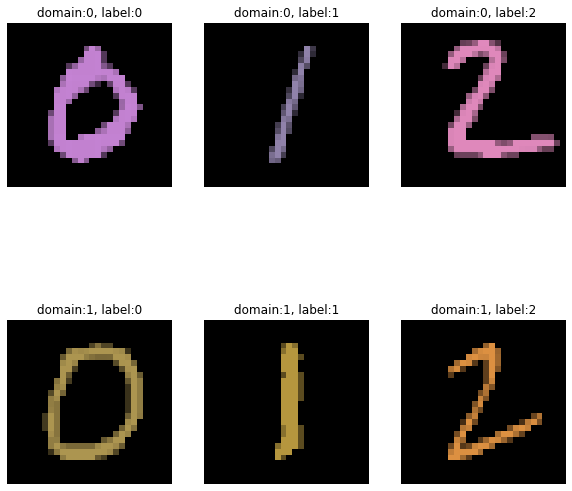

In [4]:
# plot 3 images from each domain
fig, axs = plt.subplots(datamodule.train_dataset.dataset.num_domains, 3, figsize=(10, 10))
for domain_idx in range(datamodule.train_dataset.dataset.num_domains):
    for img_idx in range(3):
        axs[domain_idx, img_idx].imshow(img[(labels == img_idx) & (batch["domain"] == domain_idx)][0].permute(1,2,0))
        axs[domain_idx, img_idx].set_title(f"domain:{domain_idx}, label:{img_idx}")
        axs[domain_idx, img_idx].axis("off")

In [10]:
z, recons = model.model(img)

In [ ]:
domain_z_mins = torch.zeros((2, 16, 5))
domain_z_maxs = torch.zeros((2, 16, 5))

# z is [batch_size, latent_dim], so is domains. For the first d dimensions
# of z, find the top_k smallest values of that dimension in each domain
# find the mask of z's for each domain
# for each domain, and for each of the first d dimensions, 
# find the top_k smallest values of that z dimension in that domain
for domain_idx in range(2):
    domain_mask = (domains == domain_idx).squeeze()
    domain_z = z[domain_mask]
    # for each dimension i among the first d dimensions of z, find the top_k
    # smallest values of dimension i in domain_z
    for i in range(16):
        domain_z_sorted, _ = torch.sort(domain_z[:, i], dim=0)
        domain_z_sorted = domain_z_sorted.squeeze()
        domain_z_sorted = domain_z_sorted[:5]
        domain_z_mins[domain_idx, i, :] = domain_z_sorted
        # find the top_k largest values of dimension i in domain_z
        domain_z_sorted, _ = torch.sort(domain_z[:, i], dim=0, descending=True)
        domain_z_sorted = domain_z_sorted.squeeze()
        domain_z_sorted = domain_z_sorted[:5]
        domain_z_maxs[domain_idx, i, :] = domain_z_sorted

mse_mins = F.mse_loss(domain_z_mins[0], domain_z_mins[1], reduction="mean")
mse_maxs = F.mse_loss(domain_z_maxs[0], domain_z_maxs[1], reduction="mean")


In [ ]:
# print(domain_z_mins[0])
# print(domain_z_mins[1])
# print(domain_z_maxs[0])
# print(domain_z_maxs[1])
mse_mins = F.mse_loss(domain_z_mins[0], domain_z_mins[1], reduction="sum")
print(mse_mins)

tensor(0.4542, grad_fn=<MseLossBackward0>)


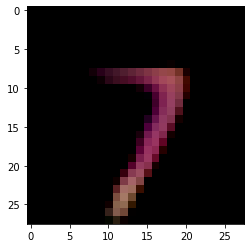

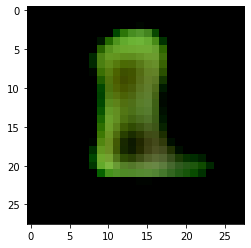

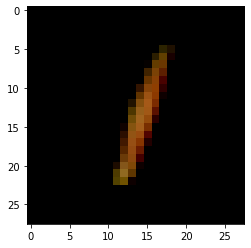

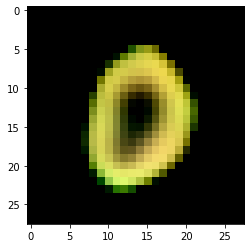

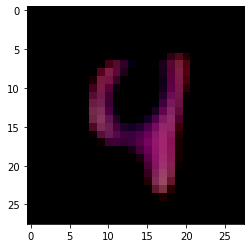

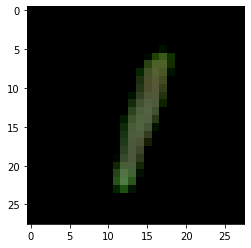

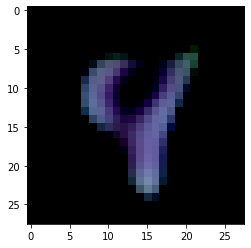

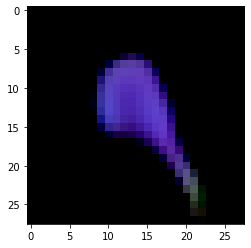

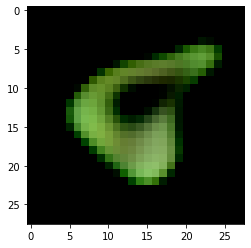

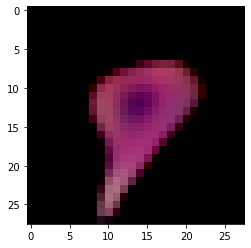

In [11]:
import matplotlib.pyplot as plt

# a function to clamps the values of a numpy array between 0,1
def clamp(x):
    return np.minimum(np.maximum(x, 0), 1)

for i in range(10):
    plt.figure()
    plt.imshow(clamp(recons[i].permute(1,2,0).detach().cpu().numpy()))

In [ ]:
# iterator = iter(datamodule.train_dataloader())
iterator = iter(datamodule.test_dataloader())
# iterator = iter(datamodule.val_dataloader())
print(next(iterator)["image"].shape)
import matplotlib.pyplot as plt
for i in range(20,40):
    sample = next(iterator)
    sample_img, sample_label, sample_domain, sample_color = sample["image"][i], sample["label"][i], sample["domain"][i], sample["color"][i]
    print(f"sample_label: {sample_label}, sample_domain: {sample_domain}, sample_color: {sample_color}")
    plt.figure()
    plt.imshow(sample_img.permute(1,2,0))
    z, recons = model.model(sample_img.unsqueeze(0))
    plt.figure()
    plt.imshow(recons[0].permute(1,2,0).detach().cpu().numpy())

In [21]:
print(f"min and max and mean of sample image: {sample_img.unsqueeze(0).min()}, {sample_img.unsqueeze(0).max()}, {sample_img.unsqueeze(0).mean()}")
print(f"min and max and mean of recon image: {recons[0].min()}, {recons[0].max()}, {recons[0].mean()}")

NameError: name 'sample_img' is not defined

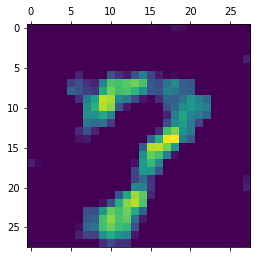

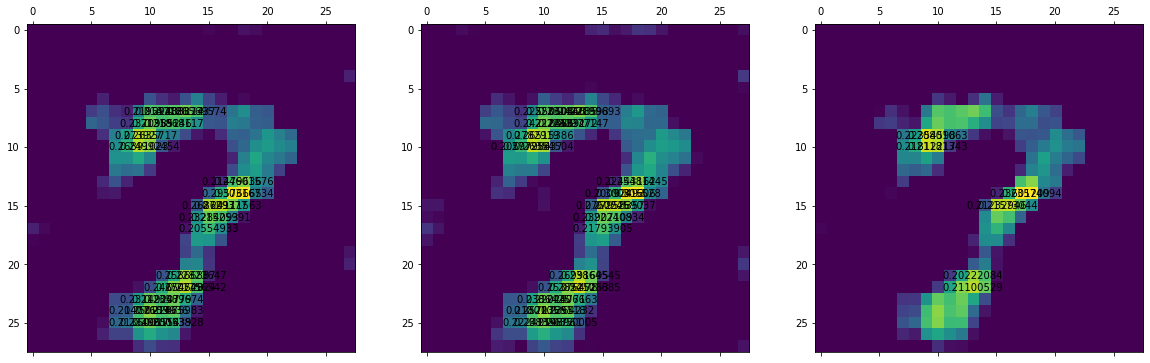

In [14]:
plt.matshow(recons[0].permute(1,2,0)[:, :, 0].detach().cpu().numpy())
# create a subplot to show the RGB channels separately. Use matshow and inside the matshow show the value of each pixel
fig, ax = plt.subplots(1, 3, figsize=(20, 20))
# show the RGB channels separately and inside the shown matrix matshow to show the values of a tensor, and also put the numerical values of the tensor in the corresponding pixels of the resulting plot
for channel in range(3):
    ax[channel].matshow(recons[0].permute(1,2,0)[:, :, channel].detach().cpu().numpy())
    for i in range(recons[0].shape[1]):
        for j in range(recons[0].shape[2]):
            if recons[0][channel, i, j] > 0.2:
                # show the value only to two decimals
                ax[channel].text(j, i, str(recons[0].permute(1,2,0)[i, j, channel].detach().cpu().numpy()), va='center', ha='center', color='black')



In [20]:
recons[0][:, 8:12, 8:12].permute(1,2,0)

tensor([[[0.0469, 0.0631, 0.0140],
         [0.1848, 0.1869, 0.1391],
         [0.2371, 0.2421, 0.1814],
         [0.2136, 0.2224, 0.1669]],

        [[0.1754, 0.1858, 0.1324],
         [0.2739, 0.2783, 0.2235],
         [0.2636, 0.2652, 0.2080],
         [0.1438, 0.1536, 0.1075]],

        [[0.1963, 0.2060, 0.1460],
         [0.2689, 0.2773, 0.2181],
         [0.2499, 0.2635, 0.2118],
         [0.0827, 0.0802, 0.0394]],

        [[0.1530, 0.1651, 0.1073],
         [0.1824, 0.1903, 0.1340],
         [0.1387, 0.1575, 0.0975],
         [0.0000, 0.0000, 0.0000]]], grad_fn=<PermuteBackward0>)

In [17]:
model

AutoencoderPL(
  (model): CNNAE(
    (encoder_cnn): Encoder(
      (layers): Sequential(
        (0): Conv2d(3, 4, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (1): ReLU()
        (2): Conv2d(4, 8, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (3): ReLU()
        (4): Conv2d(8, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (5): ReLU()
        (6): Conv2d(16, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
        (7): ReLU()
      )
    )
    (decoder_cnn): Decoder(
      (layers): Sequential(
        (0): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): ConvTranspose2d(32, 16, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
        (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU()
        (6): ConvTranspose2d(16, 8, kernel_size=

## MNIST Experiments with Encoded Images

In [ ]:
# use hydra configs to load the dataset
import hydra
from utils import hydra_custom_resolvers
import torch
from torchvision import transforms
import torch.nn.functional as F
import numpy as np
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
from PIL import Image as Image, ImageEnhance
configs_path = "configs"
# config_name = "train_root.yaml"
config_name = "train_root.yaml"

with hydra.initialize(config_path=configs_path):
    config = hydra.compose(config_name=config_name,
                            overrides=[
                                "datamodule=mnist_encoded",
                                "run_path='/home/mila/s/sayed.mansouri-tehrani/scratch/logs/training/runs/autoencoder_multi_domain_mnist_8_256/2023-09-09_04-37-16'",
                            ],
                            return_hydra_config=True,
    )

    # setup the dataset with the hydra config
    datamodule = hydra.utils.instantiate(config.datamodule, _recursive_=False)
    datamodule.prepare_data()
    datamodule.setup()

    # instantiate the model with hydra
    # model = hydra.utils.instantiate(config.model, _recursive_=False)

# renormalize = datamodule.train_dataset.dataset.renormalize()
iterator = iter(datamodule.test_dataloader())

: 

In [1]:
datamodule.train_dataset[0]["x"].shape
iterator = iter(datamodule.train_dataloader())
batch = next(iterator)
x, label, domain, color = batch["x"], batch["label"], batch["domain"], batch["color"]
print(batch["x"].shape, batch["label"].shape, batch["domain"].shape, batch["color"].shape)

NameError: name 'datamodule' is not defined

In [6]:
datamodule.valid_dataset.__len__()

60000

In [ ]:
# use hydra configs to load the dataset
import hydra
from utils import hydra_custom_resolvers
import torch
from torchvision import transforms
import torch.nn.functional as F
import numpy as np
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
from PIL import Image as Image, ImageEnhance
configs_path = "configs"
# config_name = "train_root.yaml"
config_name = "evaluate_root.yaml"

with hydra.initialize(config_path=configs_path):
    config = hydra.compose(config_name=config_name,
                            overrides=[
                                # "datamodule/dataset=mnist",
                                # "datamodule/dataset=multi_domain_mnist",
                                # if using a ckpt MAKE SURE TO USE EVALUATE CONFIG AND NOT TRAIN ^^^^
                                # "+ckpt_path='/home/mila/s/sayed.mansouri-tehrani/MD-CRL/autoencoder_multi_domain_mnist_32-epoch=52-val_loss=0.01.ckpt'",
                                "model.autoencoder.num_channels=3",
                                "+model.z_dim=256",
                                # "+ckpt_path='/home/mila/s/sayed.mansouri-tehrani/MD-CRL/autoencoder_multi_domain_mnist_8_256-epoch=18-val_loss=0.01-val_r2_hz_z=0.00-val_r2_~hz_z=0.00-v6.ckpt'",
                                # working ckpt for both digits and colours
                                "+ckpt_path='/home/mila/s/sayed.mansouri-tehrani/MD-CRL/autoencoder_multi_domain_mnist_8_256-epoch=36-val_loss=0.00-val_r2_hz_z=0.00-val_r2_~hz_z=0.00-v4.ckpt'",
                                # "model.autoencoder.num_channels=3",
                            ],
                            return_hydra_config=True,
    )

    # instantiate the model with hydra
    model = hydra.utils.instantiate(config.model, _recursive_=False)


## Balls Dataset

In [1]:
import numpy as np
import torch

### Testing dataset generation via classes

In [90]:
num_domains = 4
num_samples = 100
domain_lengths = [1 / num_domains] * num_domains
n_balls_invariant = 1
n_balls_spurious = 1
n_balls = n_balls_invariant + n_balls_spurious
ball_z_dim = 6
ball_size = 0.1

def _build_domain_grids():
        domain_lows = np.zeros((num_domains, n_balls_spurious, ball_z_dim))
        domain_highs = np.zeros((num_domains, n_balls_spurious, ball_z_dim))

        # first two dimensions correspond to x,y coordinates
        for i in range(num_domains):

            # for each domain, we sample the low and high of x,y coordinates of the balls
            domain_low_ = np.random.uniform(ball_size, 1.0 - ball_size, size=(n_balls_spurious, 2))
            domain_high_ = np.random.uniform(ball_size, 1.0 - ball_size, size=(n_balls_spurious, 2))
            # resample lows and highs until high_ for each dimension is greater than low_ for the same dimension
            while (domain_high_ < domain_low_).any() or (domain_high_ < domain_low_ + 2 * ball_size).any():
                domain_low_ = np.random.uniform(ball_size, 1.0 - ball_size, size=(n_balls_spurious, 2))
                domain_high_ = np.random.uniform(ball_size, 1.0 - ball_size, size=(n_balls_spurious, 2))

            # make sure that the intersection of any pair of grids is at least twice the size of the balls
            # this is to make sure that the balls are not initialized very close to each other
            # intersection sides of each pair of grids
            intersection_sides = np.zeros((n_balls_spurious, n_balls_spurious, 2)) + np.inf
            for j in range(n_balls_spurious):
                for k in range(j+1, n_balls_spurious):
                    # check if there is any intersection between the two grids
                    if (domain_low_[j] < domain_high_[k]).all() and (domain_high_[j] > domain_low_[k]).all():
                        intersection_sides[j, k] = np.minimum(domain_high_[j], domain_high_[k]) - np.maximum(domain_low_[j], domain_low_[k])
                    else:
                        intersection_sides[j, k] = np.inf
            # check if the intersection is at least twice the size of the balls, and if not resample
            while_loop_threshold = 100
            while (intersection_sides < 2 * ball_size).any() and while_loop_threshold > 0:
                while_loop_threshold -= 1
                domain_low_ = np.random.uniform(ball_size, 1.0 - ball_size, size=(n_balls_spurious, 2))
                domain_high_ = np.random.uniform(ball_size, 1.0 - ball_size, size=(n_balls_spurious, 2))
                while (domain_high_ < domain_low_).any() or (domain_high_ < domain_low_ + 2 * ball_size).any():
                    domain_low_ = np.random.uniform(ball_size, 1.0 - ball_size, size=(n_balls_spurious, 2))
                    domain_high_ = np.random.uniform(ball_size, 1.0 - ball_size, size=(n_balls_spurious, 2))
                for j in range(n_balls_spurious):
                    for k in range(j+1, n_balls_spurious):
                        if (domain_low_[j] < domain_high_[k]).all() and (domain_high_[j] > domain_low_[k]).all():
                            intersection_sides[j, k] = np.minimum(domain_high_[j], domain_high_[k]) - np.maximum(domain_low_[j], domain_low_[k])
                        else:
                            intersection_sides[j, k] = np.inf

            if while_loop_threshold == 0:
                if log_:
                    print(f"_build_domain_grids reached {while_loop_threshold} attempts.")
                    log.info(f"_build_domain_grids reached {while_loop_threshold} attempts.")

            domain_lows[i, :, :2] = domain_low_
            domain_highs[i, :, :2] = domain_high_

        return domain_lows, domain_highs

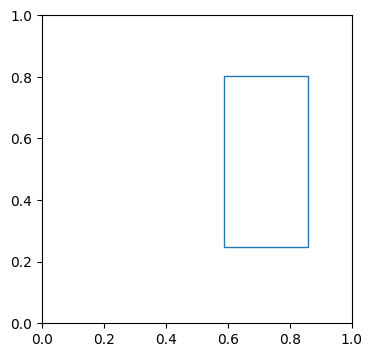

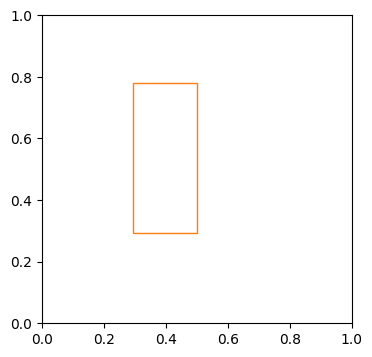

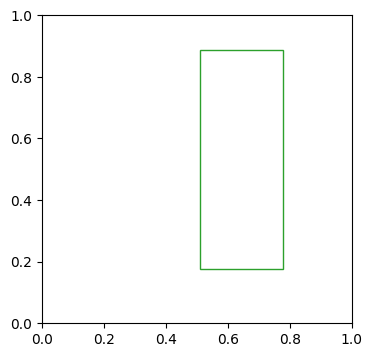

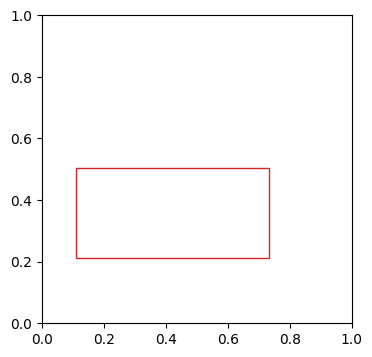

In [91]:
domain_lows, domain_highs = _build_domain_grids()
# plot rectangles for each domain's grid
import matplotlib.pyplot as plt
import matplotlib.patches as patches

for i in range(num_domains):
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    for j in range(n_balls_spurious):
        rect = patches.Rectangle(domain_lows[i, j, :2], domain_highs[i, j, 0] - domain_lows[i, j, 0], domain_highs[i, j, 1] - domain_lows[i, j, 1], linewidth=1, edgecolor="C%d" % (i), facecolor='none')
        ax.add_patch(rect)

In [98]:
import tqdm as tqdm

def _sample_z_spurious(domain_lows, domain_highs, domain_mask):
        z_spurious = np.zeros((num_samples, n_balls_spurious, ball_z_dim))
        for domain_idx in range(num_domains):
            domain_mask_ = (domain_mask == domain_idx).squeeze()
            domain_length = len(domain_mask_[domain_mask_ == True])
            for j in range(n_balls_spurious):
                z_spurious[domain_mask_, j, 0] = np.random.uniform(domain_lows[domain_idx, j, 0], domain_highs[domain_idx, j, 0], domain_length)
                z_spurious[domain_mask_, j, 1] = np.random.uniform(domain_lows[domain_idx, j, 1], domain_highs[domain_idx, j, 1], domain_length)
                z_spurious[domain_mask_, j, 2] = np.random.choice(range(4), domain_length)
                z_spurious[domain_mask_, j, 3] = np.random.choice(range(4), domain_length)
                z_spurious[domain_mask_, j, 4] = np.random.uniform(0.1, 0.3, domain_length)
                z_spurious[domain_mask_, j, 5] = np.random.uniform(0.1, 0.4, domain_length)
            # resample the first two dimensions of samples where the balls are initialized very close to each other
            z_spurious_replace = z_spurious[domain_mask_].copy()
            for i, sample in enumerate(z_spurious[domain_mask_]):
                # sample: [n_balls_spurious, ball_z_dim]
                duplicate_coordinates_threshold = ball_size * 2
                sampled_coordinates_distance_matrix = np.linalg.norm(sample[:, :2][None, :] - sample[:, :2][:, None], axis=-1)
                duplicate_mask = np.triu(sampled_coordinates_distance_matrix<duplicate_coordinates_threshold).sum(-1)>1
                while_loop_threshold = 100
                while duplicate_mask.any():
                    # print(f"{domain_idx * num_samples + i}th sample distances:\n{sampled_coordinates_distance_matrix}.")
                    # print(f"sample:\n{sample[:, :2]}")
                    # print(f"resampling {duplicate_mask.sum()} samples in domain {domain_idx} for sample {i}.")
                    while_loop_threshold -= 1
                    sample[duplicate_mask, :2] = np.random.uniform(domain_lows[domain_idx, duplicate_mask, :2], domain_highs[domain_idx, duplicate_mask, :2], (duplicate_mask.sum(), 2))
                    sampled_coordinates_distance_matrix = np.linalg.norm(sample[:, :2][None, :] - sample[:, :2][:, None], axis=-1)
                    duplicate_mask = np.triu(sampled_coordinates_distance_matrix<duplicate_coordinates_threshold).sum(-1)>1
                    
                if while_loop_threshold == 0:
                    print(f"_sample_z_spurious reached {while_loop_threshold} attempts.")
                # fill z_spurious with the new sample
                z_spurious_replace[i] = sample
            
            z_spurious[domain_mask_] = z_spurious_replace

        return z_spurious

In [99]:
domain_mask = torch.zeros(num_samples, 1)
start = 0
for domain_idx in range(num_domains):
    domain_size = int(domain_lengths[domain_idx] * num_samples)
    end = domain_size + start
    domain_mask[start:end] = domain_idx
    start = end
# sample z_spurious for each domain
z_spurious = _sample_z_spurious(domain_lows, domain_highs, domain_mask)
print("-=-=-=-==-=-=-=-=-=-=-=-=--=-=-=-==-=-=-=-=-=-=-=-=--=-=-=-==-=-=-=-=-=-=-=-=--=-=-=-==-=-=-=-=-=-=-=-=-")
# check if for any sample in z_spurious the balls are initialized very close to each other
for i, sample in enumerate(z_spurious):
    # sample: [n_balls_spurious, ball_z_dim]
    duplicate_coordinates_threshold = ball_size * 2
    sampled_coordinates_distance_matrix = np.linalg.norm(sample[:, :2][None, :] - sample[:, :2][:, None], axis=-1)
    # print(f"sampled_coordinates_distance_matrix:\n{sampled_coordinates_distance_matrix}")
    duplicate_mask = np.triu(sampled_coordinates_distance_matrix<duplicate_coordinates_threshold).sum(-1)>1
    if duplicate_mask.any():
        print(f"sample {i} has duplicate balls")

-=-=-=-==-=-=-=-=-=-=-=-=--=-=-=-==-=-=-=-=-=-=-=-=--=-=-=-==-=-=-=-=-=-=-=-=--=-=-=-==-=-=-=-=-=-=-=-=-


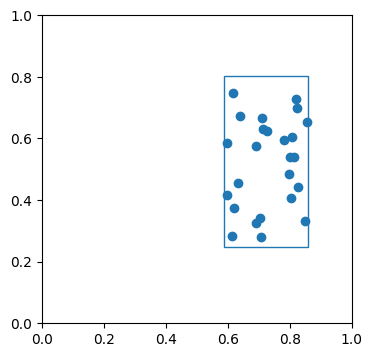

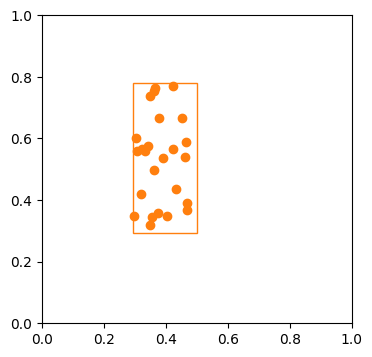

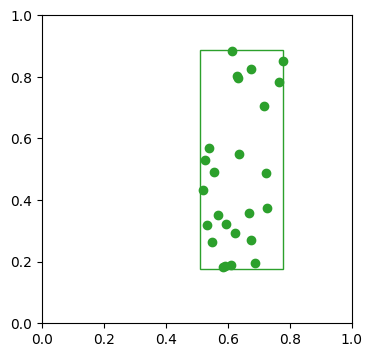

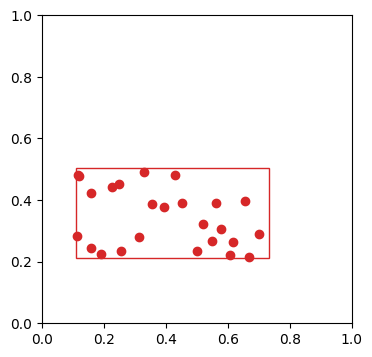

In [102]:
# now for each domain, plot the domain grids and the coordinates of spurious balls
import matplotlib.pyplot as plt
import matplotlib.patches as patches

for domain_idx in range(num_domains):
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    for j in range(n_balls_spurious):
        rect = patches.Rectangle(domain_lows[domain_idx, j, :2], domain_highs[domain_idx, j, 0] - domain_lows[domain_idx, j, 0], domain_highs[domain_idx, j, 1] - domain_lows[domain_idx, j, 1], linewidth=1, edgecolor="C%d" % (domain_idx), facecolor='none')
        ax.add_patch(rect)
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
    ax.scatter(z_spurious[(domain_mask == domain_idx).squeeze(), :, 0], z_spurious[(domain_mask == domain_idx).squeeze(), :, 1], c="C%d" % (domain_idx))

In [103]:
invariant_low = [0.1, 0.1]
invariant_high = [0.9, 0.9]
def _sample_z_invariant(z_all):
    z_invariant = np.zeros((num_samples, n_balls_invariant, ball_z_dim))
    for i in range(num_samples):
        z_invariant[i, :, 0] = np.random.uniform(invariant_low[0], invariant_high[0], n_balls_invariant)
        z_invariant[i, :, 1] = np.random.uniform(invariant_low[1], invariant_high[1], n_balls_invariant)
        z_invariant[i, :, 2] = np.random.choice(range(4), n_balls_invariant)
        z_invariant[i, :, 3] = np.random.choice(range(4), n_balls_invariant)
        z_invariant[i, :, 4] = np.random.uniform(0.2, 0.4, n_balls_invariant)
        z_invariant[i, :, 5] = np.random.uniform(0.1, 0.5, n_balls_invariant)
        # resample the first two dimension of samples where the balls are initialized very close to each other
        # make sure to compare the invariant balls together and with the spurious balls from z_all
        duplicate_coordinates_threshold = ball_size * 2
        sample_ball_coordinates = np.concatenate([z_invariant[i, :, :2], z_all[i, :, :2]], axis=0) # [n_balls_spurious + n_balls_invariant, 2]
        # print(sample_ball_coordinates.shape)
        sampled_coordinates_distance_matrix = np.linalg.norm(sample_ball_coordinates[None, :] - sample_ball_coordinates[:, None], axis=-1) # [n_balls_spurious + n_balls_invariant, n_balls_spurious + n_balls_invariant]
        duplicate_mask = np.triu(sampled_coordinates_distance_matrix<duplicate_coordinates_threshold)[:n_balls_invariant].sum(-1)>1
        while_loop_threshold = 100
        while duplicate_mask.any():
            while_loop_threshold -= 1
            z_invariant[i, duplicate_mask, :2] = np.random.uniform(invariant_low, invariant_high, (duplicate_mask.sum(), 2)).squeeze()
            sample_ball_coordinates = np.concatenate([z_invariant[i, :, :2], z_all[i, :, :2]], axis=0)
            sampled_coordinates_distance_matrix = np.linalg.norm(sample_ball_coordinates[None, :] - sample_ball_coordinates[:, None], axis=-1)
            duplicate_mask = np.triu(sampled_coordinates_distance_matrix<duplicate_coordinates_threshold)[:n_balls_invariant].sum(-1)>1
        if while_loop_threshold == 0:
                if log_:
                print(f"_sample_z_invariant reached {while_loop_threshold} attempts.")
                log.info(f"_sample_z_invariant reached {while_loop_threshold} attempts.")
    return z_invariant


            

In [104]:
z_all = np.zeros((num_samples, n_balls, 6))
z_all[:, n_balls_invariant:, :] = z_spurious
z_invariant = _sample_z_invariant(z_all)
z_all[:, :n_balls_invariant, :] = z_invariant

print("-=-=-=-==-=-=-=-=-=-=-=-=--=-=-=-==-=-=-=-=-=-=-=-=--=-=-=-==-=-=-=-=-=-=-=-=--=-=-=-==-=-=-=-=-=-=-=-=-")
# check if for any sample in z_all the balls are initialized very close to each other

for i, sample in enumerate(z_all):
    # sample: [n_balls_spurious, ball_z_dim]
    duplicate_coordinates_threshold = ball_size * 2
    sampled_coordinates_distance_matrix = np.linalg.norm(sample[:, :2][None, :] - sample[:, :2][:, None], axis=-1)
    duplicate_mask = np.triu(sampled_coordinates_distance_matrix<duplicate_coordinates_threshold).sum(-1)>1
    if duplicate_mask.any():
        print(f"sample {i} has duplicate balls")

-=-=-=-==-=-=-=-=-=-=-=-=--=-=-=-==-=-=-=-=-=-=-=-=--=-=-=-==-=-=-=-=-=-=-=-=--=-=-=-==-=-=-=-=-=-=-=-=-


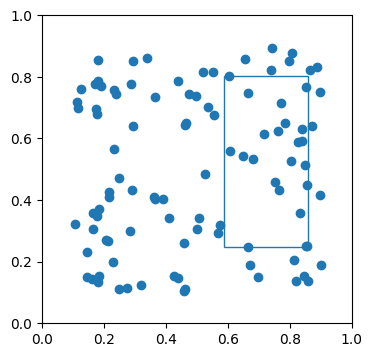

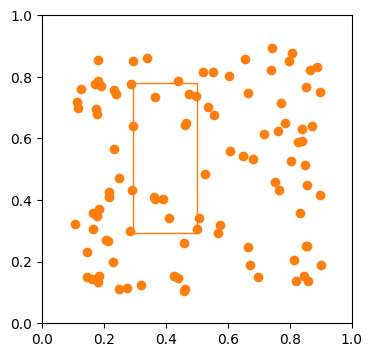

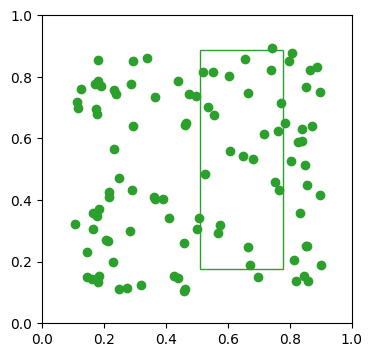

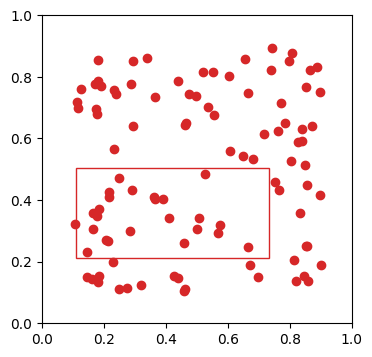

In [105]:
# plot the invariant balls along with the domain grids
import matplotlib.pyplot as plt
import matplotlib.patches as patches

for domain_idx in range(num_domains):
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    for j in range(n_balls_invariant):
        rect = patches.Rectangle(domain_lows[domain_idx, j, :2], domain_highs[domain_idx, j, 0] - domain_lows[domain_idx, j, 0], domain_highs[domain_idx, j, 1] - domain_lows[domain_idx, j, 1], linewidth=1, edgecolor="C%d" % (domain_idx), facecolor='none')
        ax.add_patch(rect)
    ax.scatter(z_invariant[:, :, 0], z_invariant[:, :, 1], c="C%d" % (domain_idx))
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    

In [38]:
a = np.random.rand(3, 3)
b = np.random.rand(1, 3)
print(a,b)
c = np.concatenate([a,b], axis=0)
print(c)

[[0.44688043 0.51338947 0.512639  ]
 [0.38916788 0.56603249 0.03026355]
 [0.35506519 0.54330849 0.39575366]] [[0.66809609 0.96960037 0.19513515]]
[[0.44688043 0.51338947 0.512639  ]
 [0.38916788 0.56603249 0.03026355]
 [0.35506519 0.54330849 0.39575366]
 [0.66809609 0.96960037 0.19513515]]


### Generating the data via config files

In [1]:
# use hydra configs to load the dataset
import hydra
from utils import hydra_custom_resolvers
import torch
from torchvision import transforms
import torch.nn.functional as F
import numpy as np
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
from PIL import Image as Image, ImageEnhance
configs_path = "configs"
# config_name = "train_root.yaml"
config_name = "train_root.yaml"

with hydra.initialize(config_path=configs_path):
    config = hydra.compose(config_name=config_name,
                            overrides=[
                                "datamodule=md_balls",
                                "datamodule.num_samples.train=30",
                                "datamodule.num_samples.valid=10",
                                "datamodule.num_samples.test=10",
                                "datamodule.dataset.n_balls_invariant=1",
                                "datamodule.dataset.n_balls_spurious=1",
                            ],
                            return_hydra_config=True,
    )

    # setup the dataset with the hydra config
    datamodule = hydra.utils.instantiate(config.datamodule, _recursive_=False)
    datamodule.prepare_data()
    datamodule.setup()

    # instantiate the model with hydra
    # model = hydra.utils.instantiate(config.model, _recursive_=False)

iterator = iter(datamodule.train_dataloader())

/tmp/ipykernel_62754/1578681712.py:15: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  with hydra.initialize(config_path=configs_path):


pygame 2.5.1 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


100%|██████████| 30/30 [00:02<00:00, 13.94it/s]


self.pickleable_dataset_params: {'min': 0.35686275, 'max': 1.0, 'mean': 0.980605, 'std': 0.09722874}


100%|██████████| 10/10 [00:00<00:00, 13.87it/s]

self.pickleable_dataset_params: {'min': 0.35686275, 'max': 1.0, 'mean': 0.98059773, 'std': 0.09724652}



/home/mila/s/sayed.mansouri-tehrani/.conda/envs/mdcrl/lib/python3.10/site-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [2]:
batch = next(iterator)

In [3]:
batch["image"].shape

torch.Size([20, 3, 64, 64])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

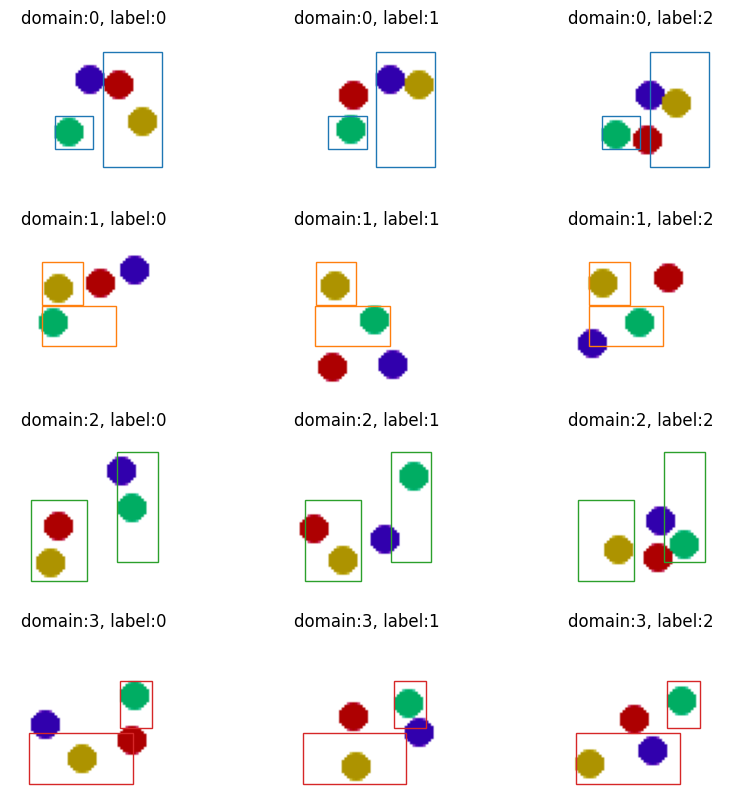

In [4]:
# plot 3 representative samples from each domain
# import patches
dim = 64
angle_ = 0.
import matplotlib.patches as patches
fig, axs = plt.subplots(datamodule.train_dataset.dataset.num_domains, 3, figsize=(10, 10))
for domain_idx in range(datamodule.train_dataset.dataset.num_domains):
    for img_idx in range(3):
        # plot the domain grid on the same ax
        for j in range(datamodule.train_dataset.dataset.n_balls_spurious):
            # rect = patches.Rectangle(dim * datamodule.train_dataset.dataset.domain_lows[domain_idx, j, :2], dim * datamodule.train_dataset.dataset.domain_highs[domain_idx, j, 0] - dim * datamodule.train_dataset.dataset.domain_lows[domain_idx, j, 0], dim * datamodule.train_dataset.dataset.domain_highs[domain_idx, j, 1] - dim * datamodule.train_dataset.dataset.domain_lows[domain_idx, j, 1], linewidth=1, edgecolor="C%d" % (domain_idx), facecolor='none')
            rect = patches.Rectangle((dim * datamodule.train_dataset.dataset.domain_lows[domain_idx, j, 0], dim * (1 - datamodule.train_dataset.dataset.domain_lows[domain_idx, j, 1] - (datamodule.train_dataset.dataset.domain_highs[domain_idx, j, 1] - datamodule.train_dataset.dataset.domain_lows[domain_idx, j, 1]))), dim * datamodule.train_dataset.dataset.domain_highs[domain_idx, j, 0] - dim * datamodule.train_dataset.dataset.domain_lows[domain_idx, j, 0], dim * datamodule.train_dataset.dataset.domain_highs[domain_idx, j, 1] - dim * datamodule.train_dataset.dataset.domain_lows[domain_idx, j, 1], linewidth=1, edgecolor="C%d" % (domain_idx), facecolor='none')
            # rect = patches.Rectangle((dim * 0.4, dim * 0.1), dim * 0.2, dim * 0.4, linewidth=1, edgecolor="C%d" % (domain_idx), facecolor='none')
            # rect = patches.Rectangle((dim * datamodule.train_dataset.dataset.domain_highs[domain_idx, j, 0], dim * datamodule.train_dataset.dataset.domain_lows[domain_idx, j, 1]), dim * datamodule.train_dataset.dataset.domain_highs[domain_idx, j, 0] - dim * datamodule.train_dataset.dataset.domain_lows[domain_idx, j, 0], dim * datamodule.train_dataset.dataset.domain_highs[domain_idx, j, 1] - dim * datamodule.train_dataset.dataset.domain_lows[domain_idx, j, 1], linewidth=1, edgecolor="C%d" % (domain_idx), facecolor='none', angle=angle_)
            # rect = patches.Rectangle(dim * (1-datamodule.train_dataset.dataset.domain_lows[domain_idx, j, :2]), dim * datamodule.train_dataset.dataset.domain_highs[domain_idx, j, 0] - dim * datamodule.train_dataset.dataset.domain_lows[domain_idx, j, 0], dim * datamodule.train_dataset.dataset.domain_highs[domain_idx, j, 1] - dim * datamodule.train_dataset.dataset.domain_lows[domain_idx, j, 1], linewidth=1, edgecolor="C%d" % (domain_idx), facecolor='none')
            # rect = patches.Rectangle((dim * 0.2, dim * 0.1), dim * 0.2, dim * 0.4, linewidth=1, edgecolor="C%d" % (domain_idx), facecolor='none')
            axs[domain_idx, img_idx].add_patch(rect)
        axs[domain_idx, img_idx].imshow(batch["image"][(batch["domain"] == domain_idx).squeeze()][img_idx].permute(1,2,0))
        axs[domain_idx, img_idx].set_title(f"domain:{domain_idx}, label:{img_idx}")
        axs[domain_idx, img_idx].axis("off")

In [ ]:
batch["color"]

In [8]:
batch["image"].mean()

tensor(0.9612)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


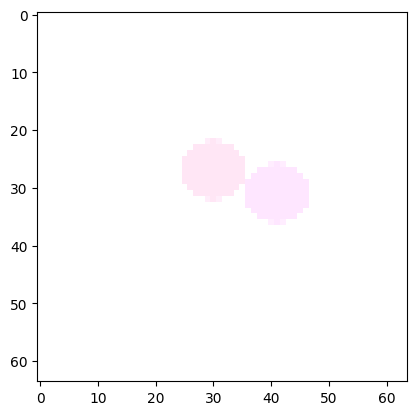

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.imshow(renormalize(batch["image"][0]).permute(1,2,0))

In [1]:
# use hydra configs to load the dataset
import hydra
from utils import hydra_custom_resolvers
import torch
from torchvision import transforms
import torch.nn.functional as F
import numpy as np
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
from PIL import Image as Image, ImageEnhance
configs_path = "configs"
# config_name = "train_root.yaml"
config_name = "train_root.yaml"

with hydra.initialize(config_path=configs_path):
    config = hydra.compose(config_name=config_name,
                            overrides=[
                                "datamodule=md_balls",
                                "datamodule.num_samples.train=30",
                                "datamodule.num_samples.valid=10",
                                "datamodule.num_samples.test=10",
                                "datamodule.dataset.n_balls_invariant=1",
                                "datamodule.dataset.n_balls_spurious=1",
                            ],
                            return_hydra_config=True,
    )

    # setup the dataset with the hydra config
    datamodule = hydra.utils.instantiate(config.datamodule, _recursive_=False)
    datamodule.prepare_data()
    datamodule.setup()

    # instantiate the model with hydra
    # model = hydra.utils.instantiate(config.model, _recursive_=False)

iterator = iter(datamodule.train_dataloader())

/tmp/ipykernel_9790/1578681712.py:15: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  with hydra.initialize(config_path=configs_path):


pygame 2.5.1 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


100%|██████████| 30/30 [00:02<00:00, 11.15it/s]


self.pickleable_dataset_params: {'min': -0.2862745, 'max': 1.0, 'mean': 0.9611955, 'std': 0.19449306}


100%|██████████| 10/10 [00:00<00:00, 11.44it/s]


self.pickleable_dataset_params: {'min': -0.2862745, 'max': 1.0, 'mean': 0.9612377, 'std': 0.19438641}


/home/mila/s/sayed.mansouri-tehrani/.conda/envs/mdcrl/lib/python3.10/site-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [2]:
batch = next(iterator)

In [3]:
renormalize = datamodule.train_dataset.renormalize()

In [4]:
b_ = renormalize(batch["image"][0]).permute(1,2,0)

In [5]:
print(b_.min(), b_.max(), b_.mean())
print(batch["image"][0].min(), batch["image"][0].max(), batch["image"][0].mean())
# print((batch["image"][0].min() / 2) + 0.5, (batch["image"][0].max() / 2) + 0.5, (batch["image"][0].mean() / 2) + 0.5)

tensor(0.3569) tensor(1.) tensor(0.9806)
tensor(0.) tensor(1.) tensor(0.9698)


In [5]:
print(b_.min(), b_.max(), b_.mean())
print(batch["image"][0].min(), batch["image"][0].max(), batch["image"][0].mean())
# print((batch["image"][0].min() / 2) + 0.5, (batch["image"][0].max() / 2) + 0.5, (batch["image"][0].mean() / 2) + 0.5)

tensor(0.3569) tensor(1.) tensor(0.9806)
tensor(-0.2863) tensor(1.) tensor(0.9612)


In [5]:
print(b_.min(), b_.max(), b_.mean())
print(batch["image"][0].min(), batch["image"][0].max(), batch["image"][0].mean())
# print((batch["image"][0].min() / 2) + 0.5, (batch["image"][0].max() / 2) + 0.5, (batch["image"][0].mean() / 2) + 0.5)

tensor(-3.7682) tensor(0.4852) tensor(0.3569)
tensor(-6.4140) tensor(0.1995) tensor(-8.2050e-07)


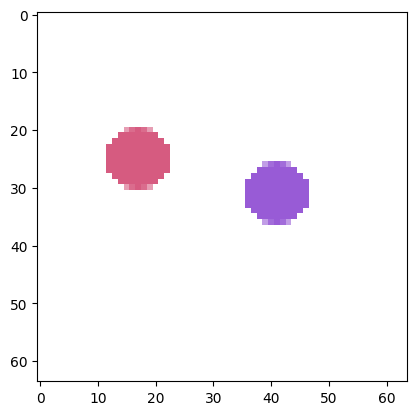

In [7]:
plt.imshow(b_)

## Polynomial Mixing

In [2]:
import sys
import os
import argparse
import random
import copy
import math

import networkx as nx
import matplotlib.pyplot as plt

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from scipy.stats import bernoulli

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_total_polynomial_terms(poly_degree, latent_dim):
    count=0
    for degree in range(poly_degree+1):
        count+= pow(latent_dim, degree)
    return count


In [2]:
import torch

# load the dataset from the path "./encoded_img_md_balls_train.pt"
dataset = torch.load("./encoded_img_md_balls_train.pt")

In [16]:
dataset["z_hat"].std()
# plot the histogram of dataset["z_hat"]
import matplotlib.pyplot as plt
plt.hist(dataset["z_hat"])

KeyboardInterrupt: 